<a href="https://colab.research.google.com/github/profitter261/Video-Games-Sale-analysis-/blob/main/Video_games_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Video Games Sales EDA

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/vgsales_cleaned.csv')

In [ ]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
!pip install mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 87.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp311-cp311-linux_x86_64.whl size=247951 sha256=e11ee2db65f20baf81c8ce60c0611bfab37ec32f2a98ab3efdb2b565ef0db04e
  Stored in directory: /root/.cache/pip/wheels/17/cd/ed/2d49e9bac69cf09382e4c7cc20a2511202b48324b87db26019
Successfully built mysql.connector


##SQL database connection using sqlite3

In [ ]:
import sqlite3

In [ ]:
# Create an SQLite database and a table
conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# Create table from DataFrame schema
df.to_sql('vgsales_cleaned', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')

# Create a cursor object
cursor = conn.cursor()

# Execute a sample query
cursor.execute("SELECT * FROM vgsales_cleaned LIMIT 5;")

# Fetch the results
results = cursor.fetchall()

# Get column names
column_names = [description[0] for description in cursor.description]

# Create a pandas DataFrame from the results
query_df = pd.DataFrame(results, columns=column_names)

# Display the DataFrame
display(query_df)

# Close the connection
conn.close()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###Which region generates the most game sales?

,Total_NA_Sales,Total_EU_Sales,Total_JP_Sales,Total_Other_Sales
0,4392.95,2434.13,1291.02,797.75


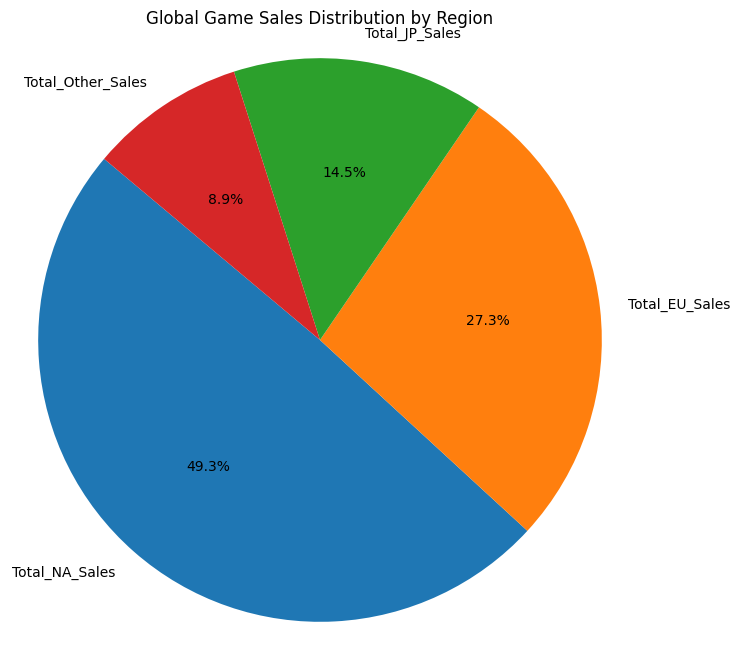

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate total sales for each region
query = """
SELECT
    SUM(NA_Sales) AS Total_NA_Sales,
    SUM(EU_Sales) AS Total_EU_Sales,
    SUM(JP_Sales) AS Total_JP_Sales,
    SUM(Other_Sales) AS Total_Other_Sales
FROM vgsales_cleaned;
"""

cursor.execute(query)
results = cursor.fetchone() # Use fetchone() because we expect only one row

# Get column names
column_names = [description[0] for description in cursor.description]

# Create a pandas DataFrame from the results
region_sales_df = pd.DataFrame([results], columns=column_names)

display(region_sales_df)

conn.close()
import matplotlib.pyplot as plt

# Extract the sales data and region names from the DataFrame
sales_data = region_sales_df.iloc[0].values
regions = region_sales_df.columns

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_data, labels=regions, autopct='%1.1f%%', startangle=140)
plt.title('Global Game Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###What are the best-selling platforms?

,Platform,Total_Global_Sales
0,PS2,1255.64
1,X360,979.96
2,PS3,957.84
3,Wii,926.71
4,DS,822.49
5,PS,730.66
6,GBA,318.50
7,PSP,296.28
8,PS4,278.10
9,PC,258.82


/tmp/ipython-input-52-3911620476.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Total_Global_Sales', data=top_10_platforms, palette='viridis')


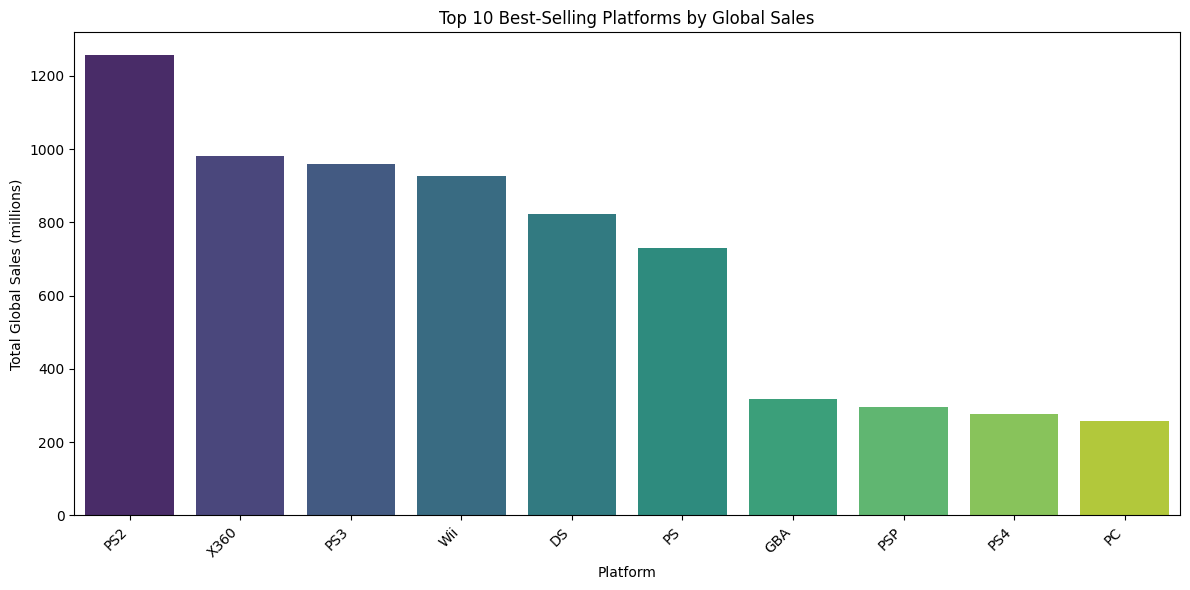

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate global sales by platform
query = """
SELECT Platform, SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales_cleaned
GROUP BY Platform
ORDER BY Total_Global_Sales DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
platform_sales_df = pd.DataFrame(results, columns=column_names)

display(platform_sales_df)

conn.close()
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 platforms for better visualization
top_10_platforms = platform_sales_df.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Total_Global_Sales', data=top_10_platforms, palette='viridis')
plt.title('Top 10 Best-Selling Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Analyze trend of game releases and sales over years

### Subtask:
Query the database to get the count of game releases and total sales per year. Visualize the results using line plots to show the trends over time.


**Reasoning**:
Query the SQLite database to get the count of game releases and total sales per year and then visualize the trends using line plots.



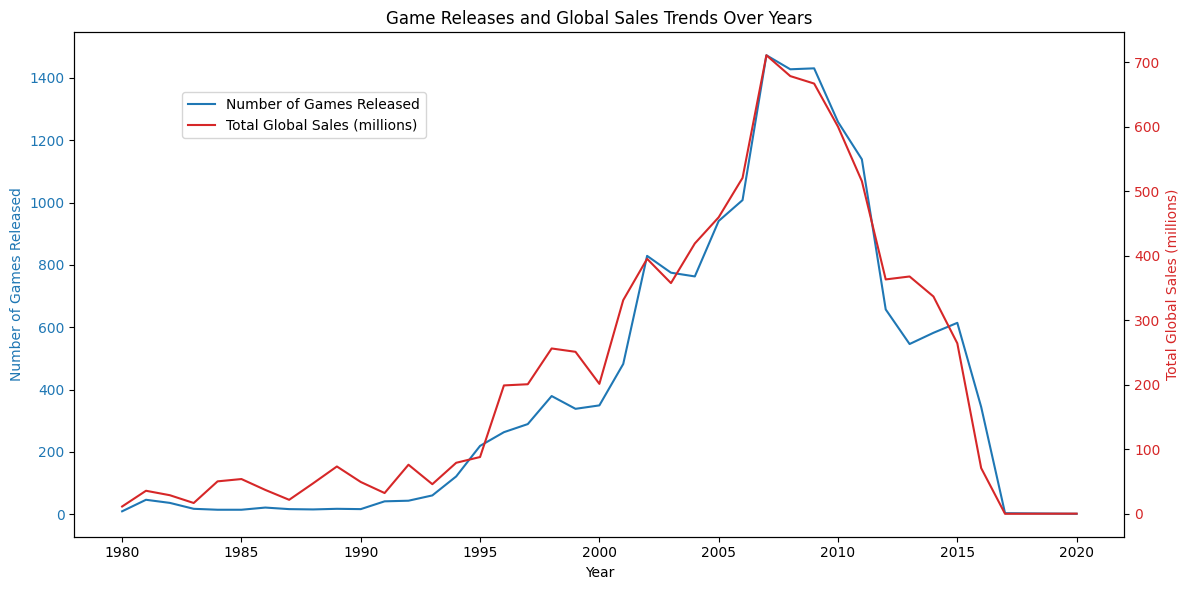

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get game count and total sales per year
query = """
SELECT
    Year,
    COUNT(*) AS Game_Count,
    SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales_cleaned
GROUP BY Year
ORDER BY Year;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
yearly_trends_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Create plots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Game Count
ax1.plot(yearly_trends_df['Year'], yearly_trends_df['Game_Count'], label='Number of Games Released', color='tab:blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Games Released', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for Total Global Sales
ax2 = ax1.twinx()
ax2.plot(yearly_trends_df['Year'], yearly_trends_df['Total_Global_Sales'], label='Total Global Sales (millions)', color='tab:red')
ax2.set_ylabel('Total Global Sales (millions)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
plt.title('Game Releases and Global Sales Trends Over Years')
fig.tight_layout() # Adjust layout
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85)) # Add legend

plt.show()

## Identify top publishers by sales

### Subtask:
Query the database to calculate total global sales for each publisher. Display the top publishers and potentially visualize the results.


**Reasoning**:
Connect to the database, query the total global sales per publisher, create a DataFrame, and display the results.



In [ ]:
conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate total global sales for each publisher
query = """
SELECT Publisher, SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales_cleaned
GROUP BY Publisher
ORDER BY Total_Global_Sales DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
publisher_sales_df = pd.DataFrame(results, columns=column_names)

display(publisher_sales_df)

conn.close()

,Publisher,Total_Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1125.20
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
...,...,...
573,Epic Games,0.01
574,EON Digital Entertainment,0.01
575,Commseed,0.01
576,Boost On,0.01


**Reasoning**:
Visualize the total global sales for the top publishers using a bar plot.



/tmp/ipython-input-37-2156713361.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publisher', y='Total_Global_Sales', data=top_15_publishers, palette='viridis')


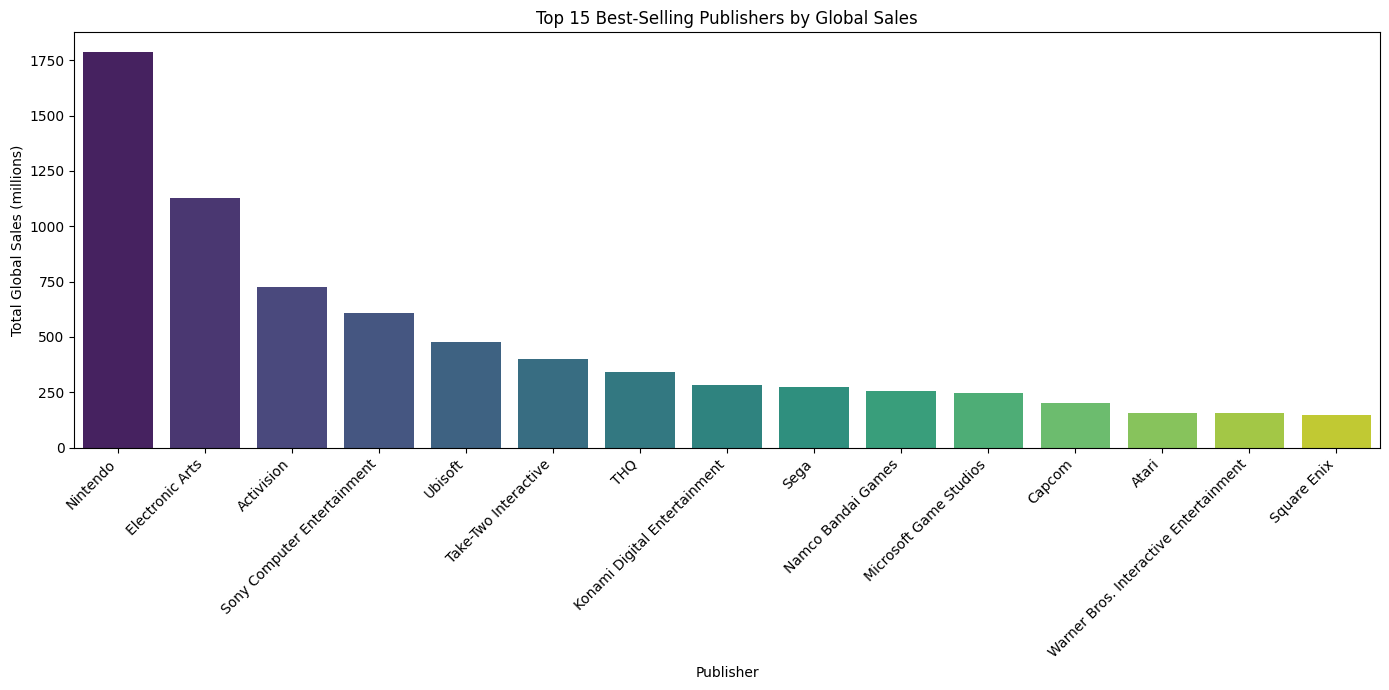

In [ ]:
# Select the top 15 publishers for better visualization
top_15_publishers = publisher_sales_df.head(15)

# Create a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='Publisher', y='Total_Global_Sales', data=top_15_publishers, palette='viridis')
plt.title('Top 15 Best-Selling Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Find the top 10 best-sellers globally

### Subtask:
Query the database to get the top 10 games based on global sales. Display the results.


**Reasoning**:
Query the database to get the top 10 games based on global sales and display the results.



,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,28.31


/tmp/ipython-input-48-1832551186.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='Global_Sales', data=top_games_df, palette='viridis')


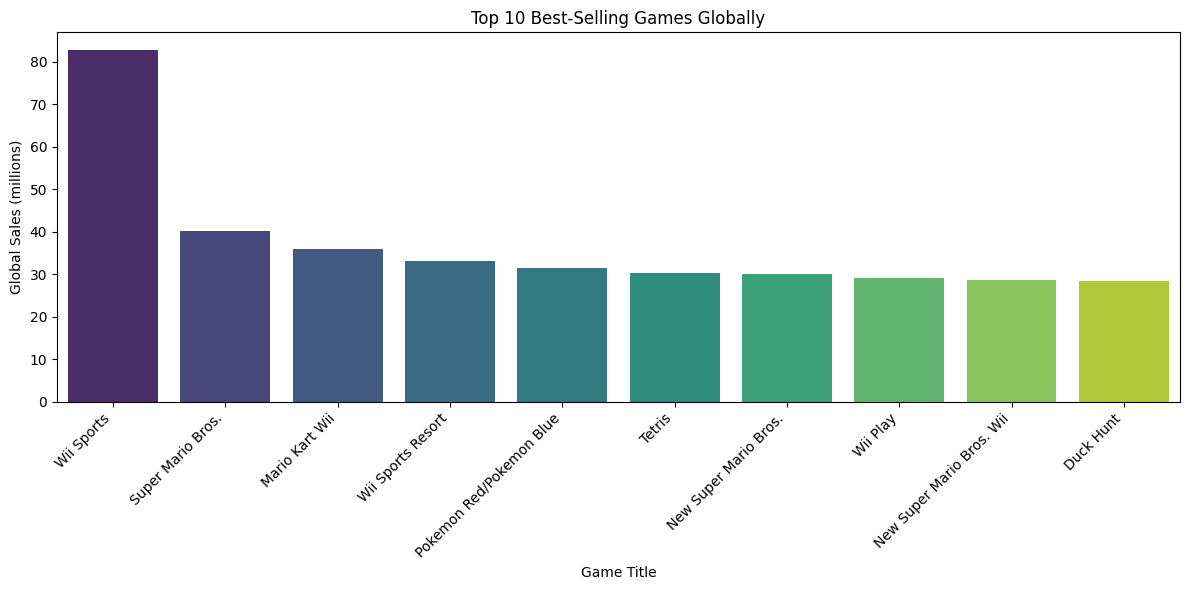

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to select the top 10 games based on global sales
query = """
SELECT Rank, Name, Platform, Year, Genre, Publisher, Global_Sales
FROM vgsales_cleaned
ORDER BY Global_Sales DESC
LIMIT 10;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
top_games_df = pd.DataFrame(results, columns=column_names)

display(top_games_df)

conn.close()
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for top 10 games
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Global_Sales', data=top_games_df, palette='viridis')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Compare regional sales for specific platforms

### Subtask:
Query the database to get regional sales for each platform. Visualize the results, perhaps using grouped bar charts for selected platforms.


**Reasoning**:
I will now write the Python code to connect to the SQLite database, execute a SQL query to get the regional sales for each platform, and create a DataFrame with the results. Then, I will select the top 10 platforms by global sales and melt the DataFrame to prepare it for visualization. Finally, I will create a grouped bar chart to show the regional sales for these top platforms. This combines all the steps of the subtask into a single code block for efficiency.



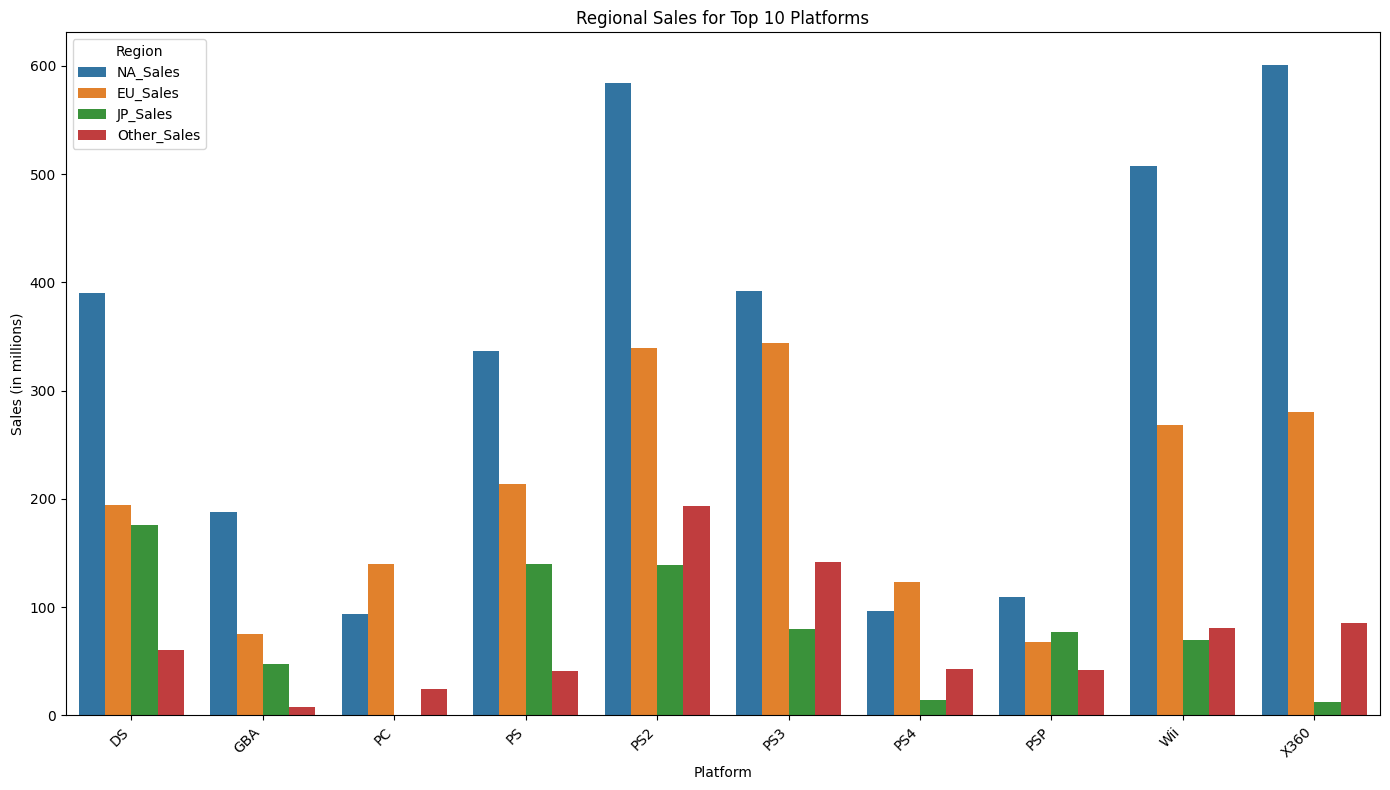

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get regional sales for each platform
query = """
SELECT
    Platform,
    SUM(NA_Sales) AS NA_Sales,
    SUM(EU_Sales) AS EU_Sales,
    SUM(JP_Sales) AS JP_Sales,
    SUM(Other_Sales) AS Other_Sales
FROM vgsales_cleaned
GROUP BY Platform;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
platform_regional_sales_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Get the top 10 platforms from the previously created platform_sales_df
top_10_platforms_list = platform_sales_df.head(10)['Platform'].tolist()

# Filter the regional sales data for the top 10 platforms
top_10_regional_sales_df = platform_regional_sales_df[platform_regional_sales_df['Platform'].isin(top_10_platforms_list)]

# Melt the DataFrame for visualization
melted_df = pd.melt(top_10_regional_sales_df, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                    var_name='Region', value_name='Sales')

# Create the grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Platform', y='Sales', hue='Region', data=melted_df)

# Add title and labels
plt.title('Regional Sales for Top 10 Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')

# Display the plot
plt.tight_layout()
plt.show()

## Analyze how the market evolved by platform over time

### Subtask:
Query the database to get global sales for each platform per year. Visualize the results using line plots, potentially focusing on key platforms.


**Reasoning**:
Connect to the SQLite database and execute the SQL query to get global sales per platform per year, then create a pandas DataFrame and identify key platforms for visualization, and finally plot the data for the selected platforms.



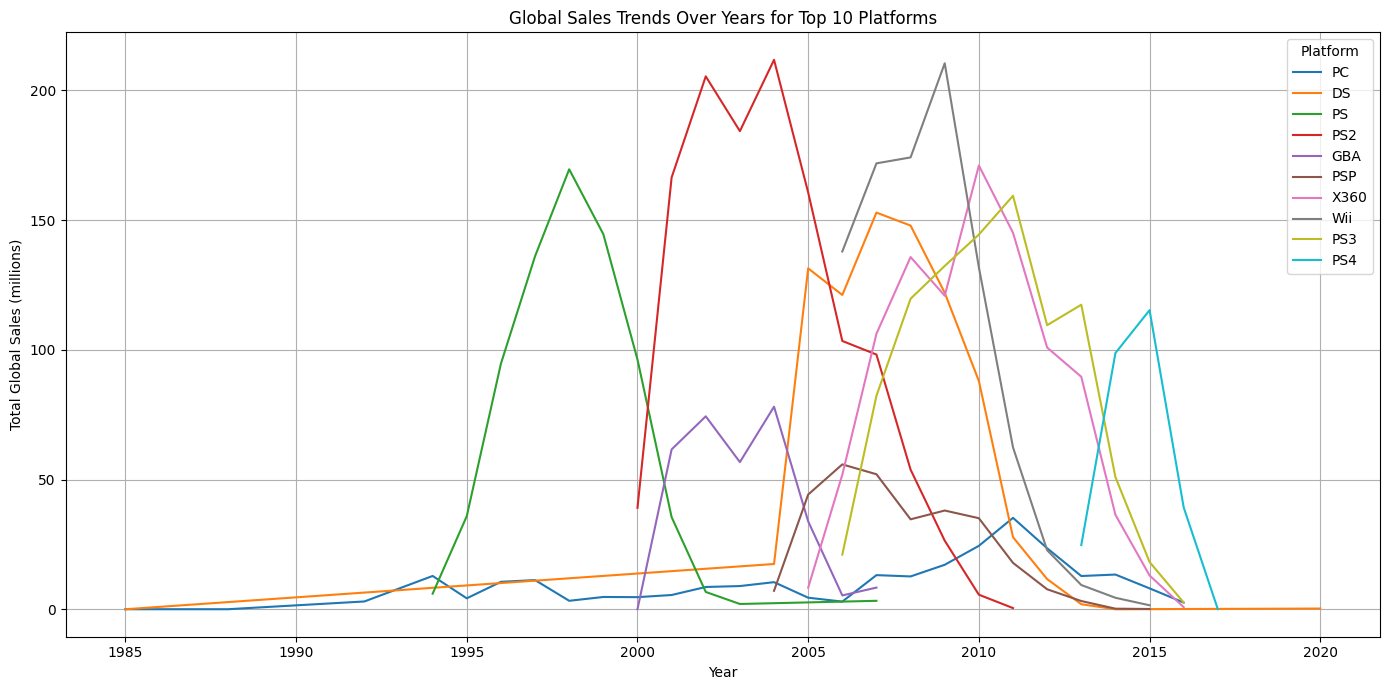

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get global sales for each platform per year
query = """
SELECT
    Year,
    Platform,
    SUM(Global_Sales) AS Total_Global_Sales
FROM vgsales_cleaned
GROUP BY Year, Platform
ORDER BY Year, Total_Global_Sales DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
platform_yearly_sales_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Identify key platforms for visualization (e.g., top 10 platforms by overall sales)
# We'll use the previously generated platform_sales_df for this
top_10_platforms_list = platform_sales_df.head(10)['Platform'].tolist()

# Filter the yearly sales data for the top 10 platforms
top_platforms_yearly_sales_df = platform_yearly_sales_df[platform_yearly_sales_df['Platform'].isin(top_10_platforms_list)]

# Create line plots for the selected platforms
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Total_Global_Sales', hue='Platform', data=top_platforms_yearly_sales_df)

# Add title and labels
plt.title('Global Sales Trends Over Years for Top 10 Platforms')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.legend(title='Platform')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## Determine regional genre preferences

### Subtask:
Query the database to get regional sales for each genre. Visualize the results, perhaps using grouped bar charts or heatmaps.


**Reasoning**:
Query the database to get regional sales for each genre and store the results in a pandas DataFrame.



In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate regional sales for each genre
query = """
SELECT
    Genre,
    SUM(NA_Sales) AS NA_Sales,
    SUM(EU_Sales) AS EU_Sales,
    SUM(JP_Sales) AS JP_Sales,
    SUM(Other_Sales) AS Other_Sales
FROM vgsales_cleaned
GROUP BY Genre;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
genre_regional_sales_df = pd.DataFrame(results, columns=column_names)

conn.close()

**Reasoning**:
Melt the DataFrame to a long format and then create a grouped bar chart to visualize regional sales by genre.



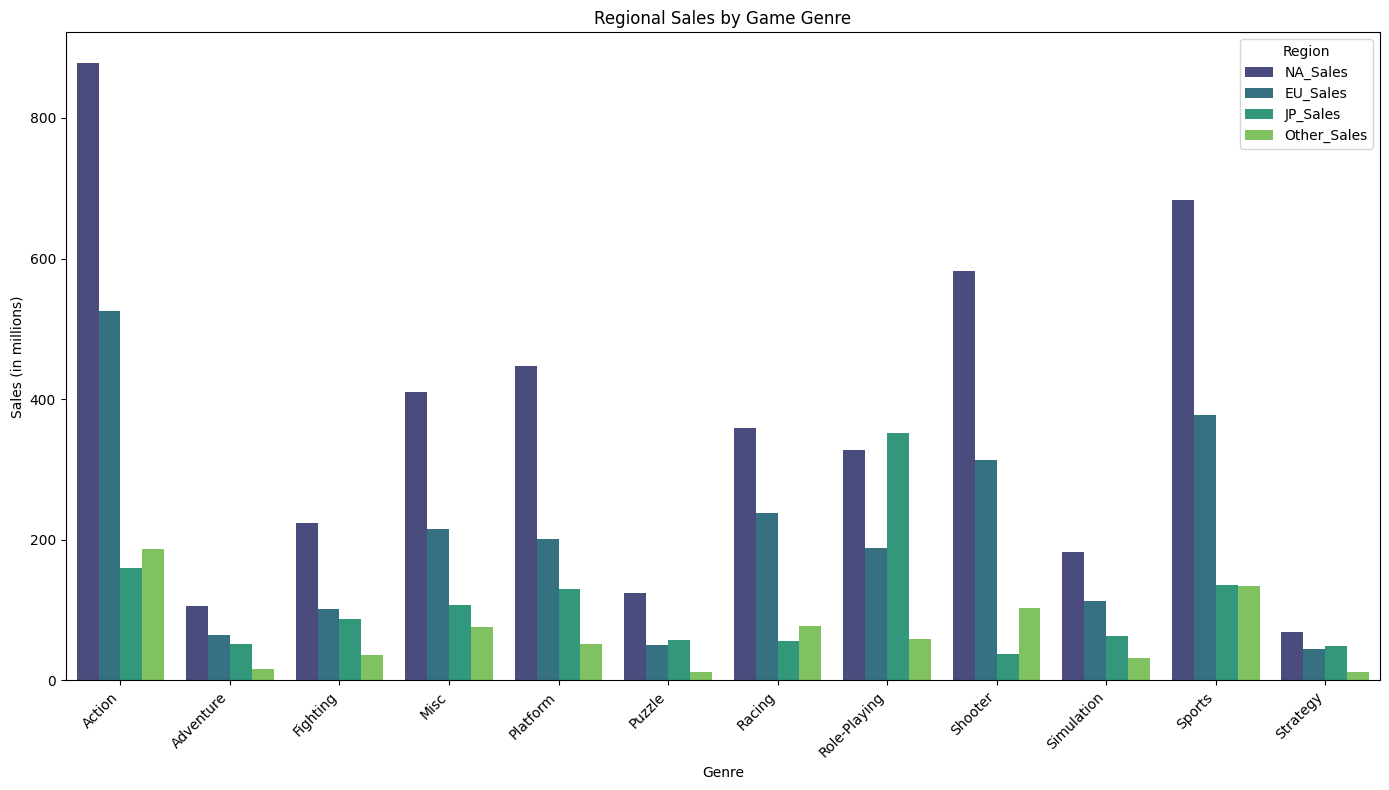

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to have 'Genre', 'Region', and 'Sales' columns
melted_genre_sales_df = pd.melt(genre_regional_sales_df, id_vars=['Genre'],
                                value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                                var_name='Region', value_name='Sales')

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Genre', y='Sales', hue='Region', data=melted_genre_sales_df, palette='viridis')

# Add title and labels
plt.title('Regional Sales by Game Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Region')

# Ensure the layout is tight to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

## Calculate yearly sales change per region

### Subtask:
Query the database to get yearly sales for each region. Calculate the year-over-year change and visualize the results using line plots.


**Reasoning**:
Query the database to get yearly sales for each region, calculate the year-over-year change, and prepare the data for plotting.



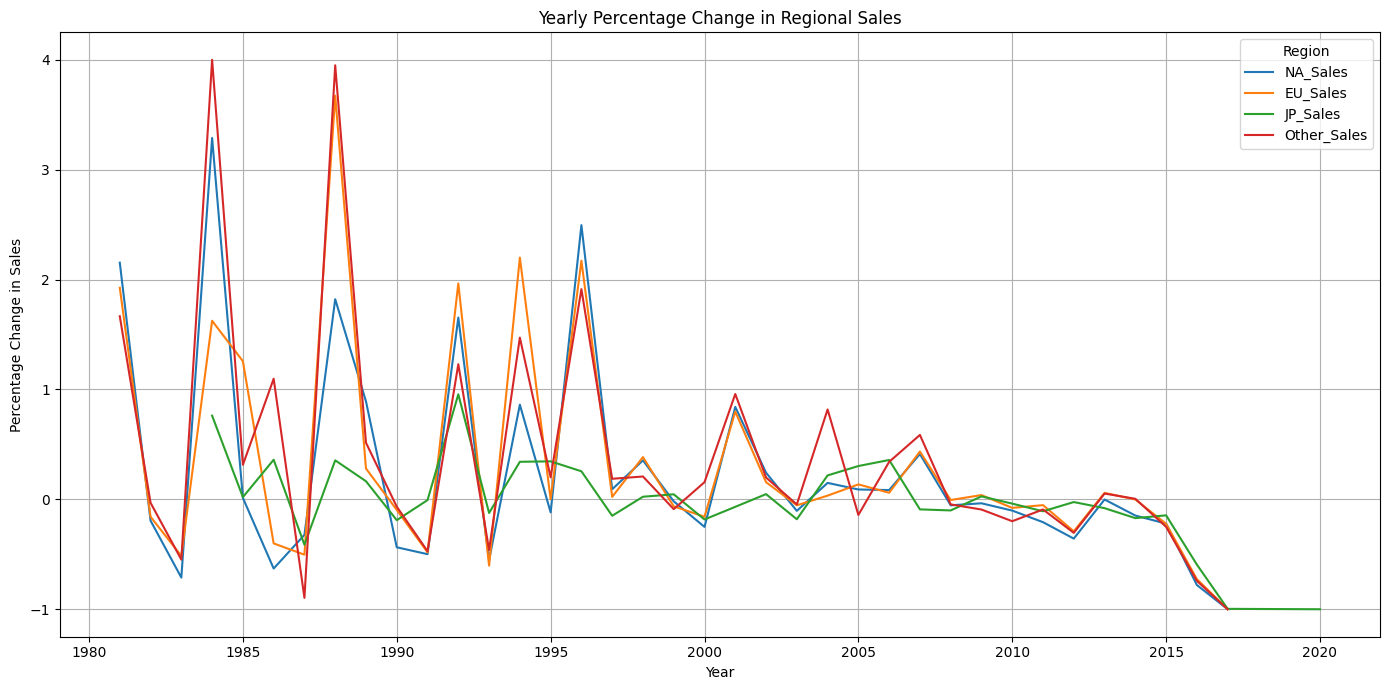

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get yearly sales for each region
query = """
SELECT
    Year,
    SUM(NA_Sales) AS NA_Sales,
    SUM(EU_Sales) AS EU_Sales,
    SUM(JP_Sales) AS JP_Sales,
    SUM(Other_Sales) AS Other_Sales
FROM vgsales_cleaned
GROUP BY Year
ORDER BY Year;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
yearly_regional_sales_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Calculate year-over-year percentage change for each regional sales column
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    yearly_regional_sales_df[f'{col}_Change'] = yearly_regional_sales_df[col].pct_change()

# Melt the DataFrame to a long format for plotting
yearly_change_cols = [f'{col}_Change' for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
melted_yearly_change_df = pd.melt(yearly_regional_sales_df, id_vars=['Year'], value_vars=yearly_change_cols,
                                  var_name='Region', value_name='Sales_Change')

# Map the melted region names back to original region names for better legend
region_name_map = {
    'NA_Sales_Change': 'NA_Sales',
    'EU_Sales_Change': 'EU_Sales',
    'JP_Sales_Change': 'JP_Sales',
    'Other_Sales_Change': 'Other_Sales'
}
melted_yearly_change_df['Region'] = melted_yearly_change_df['Region'].map(region_name_map)

# Remove the first year as percentage change is not applicable
melted_yearly_change_df = melted_yearly_change_df.dropna(subset=['Sales_Change'])

# Create a line plot for yearly percentage change in regional sales
plt.figure(figsize=(14, 7))
sns.lineplot(x='Year', y='Sales_Change', hue='Region', data=melted_yearly_change_df)

# Add title and labels
plt.title('Yearly Percentage Change in Regional Sales')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Sales')
plt.legend(title='Region')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## Find the average sales per publisher

### Subtask:
Query the database to calculate the average global sales for games by each publisher. Display the results and potentially visualize the top publishers by average sales.


**Reasoning**:
Connect to the database, execute the SQL query to calculate average global sales per publisher, load the results into a DataFrame, display the DataFrame, close the connection, select the top publishers, and create a bar plot to visualize the average sales of these top publishers.



,Publisher,Average_Global_Sales
0,Palcom,4.170000
1,Red Orb,2.620000
2,Nintendo,2.541337
3,Arena Entertainment,2.360000
4,UEP Systems,2.250000
...,...,...
573,Epic Games,0.010000
574,EON Digital Entertainment,0.010000
575,Commseed,0.010000
576,Boost On,0.010000


/tmp/ipython-input-44-2199999427.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Publisher', y='Average_Global_Sales', data=top_20_publishers, palette='viridis')


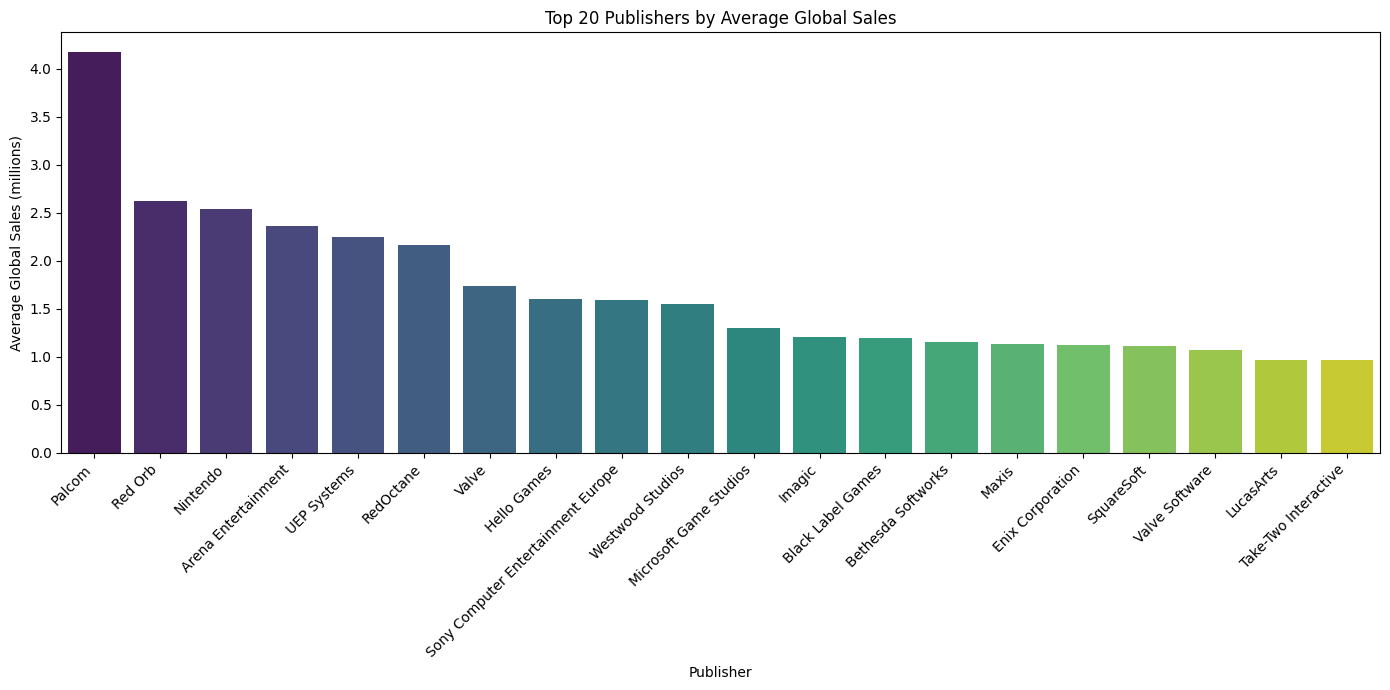

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate the average global sales for each publisher
query = """
SELECT Publisher, AVG(Global_Sales) AS Average_Global_Sales
FROM vgsales_cleaned
GROUP BY Publisher
ORDER BY Average_Global_Sales DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
publisher_average_sales_df = pd.DataFrame(results, columns=column_names)

display(publisher_average_sales_df)

conn.close()

# Select the top 20 publishers for visualization
top_20_publishers = publisher_average_sales_df.head(20)

# Create a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='Publisher', y='Average_Global_Sales', data=top_20_publishers, palette='viridis')
plt.title('Top 20 Publishers by Average Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Average Global Sales (millions)')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Identify the top 5 best-selling games per platform

### Subtask:
Query the database to get the top 5 games by global sales for each platform. Display the results, potentially in a structured format or table.


**Reasoning**:
Connect to the SQLite database and execute a SQL query to get the top 5 games by global sales for each platform using a window function. Then, load the results into a DataFrame and display it.



In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get the top 5 games by global sales for each platform
query = """
WITH RankedSales AS (
    SELECT
        Rank,
        Name,
        Platform,
        Year,
        Genre,
        Publisher,
        Global_Sales,
        ROW_NUMBER() OVER(PARTITION BY Platform ORDER BY Global_Sales DESC) as rn
    FROM vgsales_cleaned
)
SELECT
    Rank,
    Name,
    Platform,
    Year,
    Genre,
    Publisher,
    Global_Sales
FROM RankedSales
WHERE rn <= 5;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
top_games_by_platform_df = pd.DataFrame(results, columns=column_names)

display(top_games_by_platform_df)

conn.close()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,90,Pac-Man,2600,1982,Puzzle,Atari,7.81
1,240,Pitfall!,2600,1981,Platform,Activision,4.50
2,259,Asteroids,2600,1980,Shooter,Atari,4.31
3,545,Missile Command,2600,1980,Shooter,Atari,2.76
4,608,Space Invaders,2600,2007,Shooter,Atari,2.53
...,...,...,...,...,...,...,...
137,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,7.30
138,194,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,5.13
139,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,5.08
140,261,Halo 5: Guardians,XOne,2015,Shooter,Microsoft Game Studios,4.26


## Summary:

### Data Analysis Key Findings

*   **Yearly Trends:** The number of game releases and total global sales show distinct trends over the years.
*   **Top Publishers:** Nintendo leads significantly in total global sales, followed by Electronic Arts and Activision.
*   **Top 10 Games:** "Wii Sports" is the global best-seller. The top 10 games are dominated by Nintendo titles on Nintendo platforms.
*   **Regional Platform Sales:** Sales performance varies significantly by region for different platforms. The grouped bar chart clearly illustrates these regional preferences for the top 10 platforms.
*   **Platform Evolution:** Line plots visualize the global sales trends for the top platforms over time, indicating the rise and fall of different platforms in the market.
*   **Regional Genre Preferences:** The grouped bar chart reveals distinct genre sales preferences across North America, Europe, Japan, and other regions.
*   **Yearly Regional Sales Change:** The line plot shows the year-over-year percentage change in sales for each region, highlighting periods of growth and decline in regional markets.
*   **Average Sales per Publisher:** While Nintendo has the highest total sales, publishers like Palcom, Red Orb, and Arena Entertainment show higher average sales per game, suggesting a potentially different publishing strategy or focus on high-impact titles.
*   **Top Games per Platform:** A structured table displays the top 5 best-selling games for each individual platform, providing a detailed view of platform-specific successes.

### Insights or Next Steps

*   Further investigate the periods of significant year-over-year sales change in each region to understand the driving factors (e.g., major console releases, economic conditions, popular game launches).
*   Analyze the genre preferences within specific top-performing regions (e.g., Japan's preference for certain genres) to inform targeted marketing or development strategies.


In [ ]:
df2 = pd.read_csv('/content/games_cleaned.csv')

In [ ]:
df2

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...","Bu tre bu oyunla girmeye almak hatayd sanrm, E...",269.0,79.0,388.0,602.0
6626,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6627,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6628,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0


In [ ]:
# Create an SQLite database and a table for df2
conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# Create table from df2 DataFrame schema
df2.to_sql('games_cleaned', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

# Task
Provide SQL queries, tables, and visualizations using the dataframe `df2` for the following questions: "What are the top-rated games by user reviews?", "Which developers (Teams) have the highest average ratings?", "What are the most common genres in the dataset?", "Which games have the highest backlog compared to wishlist?", "What is the game release trend across years?", "What is the distribution of user ratings?", "What are the top 10 most wishlisted games?", "What’s the average number of plays per genre?", and "Which developer studios are the most productive and impactful?".

## Top-rated games by user reviews

### Subtask:
Query the database to get games ordered by rating and number of reviews. Display the top games.


**Reasoning**:
Connect to the SQLite database, query the top games by rating and number of reviews, create a DataFrame, and display the results.



**Reasoning**:
Create a bar chart to visualize the ratings of the top games.

/tmp/ipython-input-11-4260049693.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Rating', data=top_10_rated_games, palette='viridis')


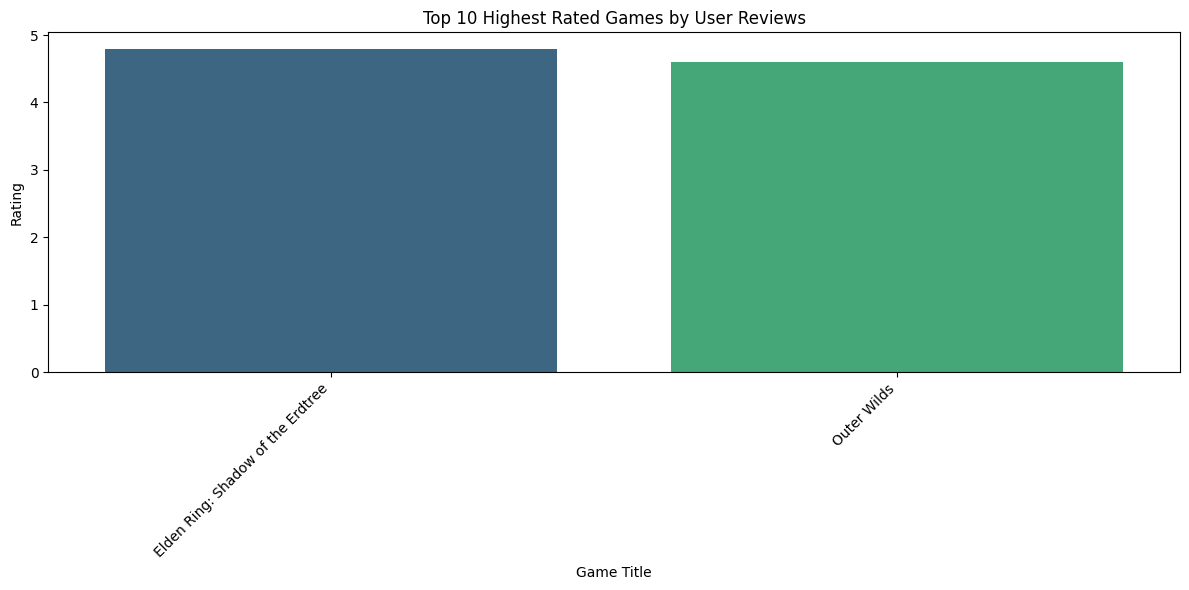

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get games ordered by rating and number of reviews
query = """
SELECT
    Title,
    Rating,
    "Number of Reviews"
FROM games_cleaned
ORDER BY Rating DESC, "Number of Reviews" DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
top_rated_games_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Select the top 10 games for visualization
top_10_rated_games = top_rated_games_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Rating', data=top_10_rated_games, palette='viridis')
plt.title('Top 10 Highest Rated Games by User Reviews')
plt.xlabel('Game Title')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Developers (Teams) with highest average ratings

### Subtask:
Query the database to calculate the average rating for each team. Display the teams with the highest average ratings and visualize the results.

**Reasoning**:
Query the database to calculate the average rating for each team, create a DataFrame with the results, display the DataFrame, select the top teams, and create a bar chart to visualize the average ratings of these top teams.

,Team,Average_Rating
0,Konami Digital Entertainment,4.60
1,Kitfox Games,4.60
2,Inlusio Interactive,4.60
3,Bay 12 Games,4.60
4,ZAUM,4.60
...,...,...
660,GOA Games Services Ltd,2.10
661,Double Helix Games,2.10
662,Parsec Productions,2.00
663,Euphoric Brothers,1.32


/tmp/ipython-input-12-1466373934.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Average_Rating', data=top_20_teams, palette='viridis')


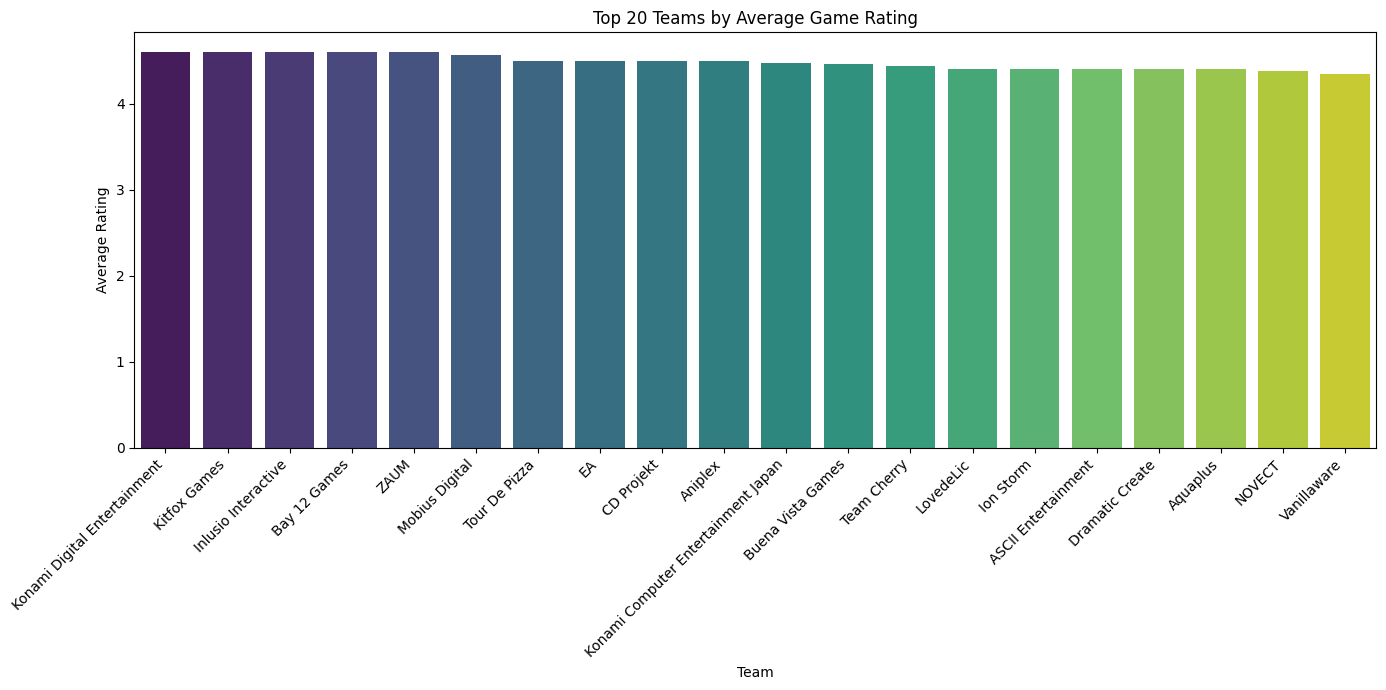

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate the average rating for each team
query = """
SELECT Team, AVG(Rating) AS Average_Rating
FROM games_cleaned
GROUP BY Team
ORDER BY Average_Rating DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
team_average_ratings_df = pd.DataFrame(results, columns=column_names)

display(team_average_ratings_df)

conn.close()

# Select the top 20 teams for visualization
top_20_teams = team_average_ratings_df.head(20)

# Create a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='Team', y='Average_Rating', data=top_20_teams, palette='viridis')
plt.title('Top 20 Teams by Average Game Rating')
plt.xlabel('Team')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Most common genres

### Subtask:
Query the database to count the occurrences of each genre. Display the most common genres and visualize the distribution.

**Reasoning**:
Query the database to count the occurrences of each genre, create a DataFrame with the results, and display the most common genres.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to count the occurrences of each genre
query = """
SELECT Genres, COUNT(*) AS Genre_Count
FROM games_cleaned
GROUP BY Genres
ORDER BY Genre_Count DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
genre_counts_df = pd.DataFrame(results, columns=column_names)

display(genre_counts_df)

conn.close()

,Genres,Genre_Count
0,Adventure,1863
1,RPG,959
2,Shooter,665
3,Platform,608
4,Indie,467
5,Puzzle,318
6,Brawler,300
7,Strategy,262
8,Simulator,210
9,Turn Based Strategy,198


**Reasoning**:
Visualize the distribution of the most common genres using a bar plot.

/tmp/ipython-input-14-3024896268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genres', y='Genre_Count', data=top_10_genres, palette='viridis')


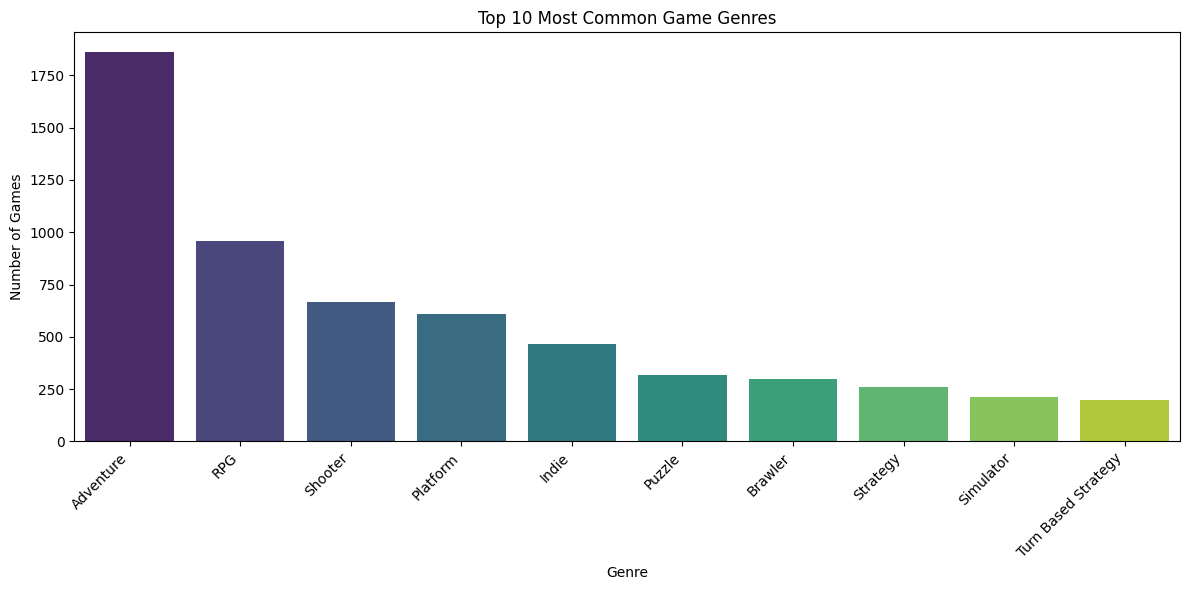

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 most common genres for visualization
top_10_genres = genre_counts_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Genres', y='Genre_Count', data=top_10_genres, palette='viridis')
plt.title('Top 10 Most Common Game Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Games with the highest backlog compared to wishlist

### Subtask:
Query the database to get games with their backlog and wishlist counts. Calculate a metric to represent the backlog compared to the wishlist. Display games with the highest backlog relative to wishlist.

**Reasoning**:
Query the database to get the backlog and wishlist counts for each game, calculate the ratio of backlog to wishlist, create a DataFrame with the results, and display the games with the highest backlog-to-wishlist ratio.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get game titles, backlog, and wishlist counts
query = """
SELECT
    Title,
    Backlogs,
    Wishlist
FROM games_cleaned
WHERE Wishlist > 0; -- Exclude games with 0 wishlist to avoid division by zero
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
backlog_wishlist_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Calculate the ratio of Backlogs to Wishlist
backlog_wishlist_df['Backlog_to_Wishlist_Ratio'] = backlog_wishlist_df['Backlogs'] / backlog_wishlist_df['Wishlist']

# Sort by the calculated ratio in descending order
backlog_wishlist_df = backlog_wishlist_df.sort_values(by='Backlog_to_Wishlist_Ratio', ascending=False)

# Display the games with the highest backlog compared to wishlist
display(backlog_wishlist_df.head(10)) # Display top 10 games with highest ratio

,Title,Backlogs,Wishlist,Backlog_to_Wishlist_Ratio
2991,Paladins,188.0,16.0,11.75
2990,Paladins,188.0,16.0,11.75
5748,Figment,392.0,35.0,11.20
5751,Figment,392.0,35.0,11.20
5750,Figment,392.0,35.0,11.20
5749,Figment,392.0,35.0,11.20
5752,Figment,392.0,35.0,11.20
3799,Fortnite,470.0,47.0,10.00
3798,Fortnite,470.0,47.0,10.00
3800,Fortnite,470.0,47.0,10.00


**Reasoning**:
Visualize the backlog-to-wishlist ratio for the top games using a bar plot.

/tmp/ipython-input-16-2861941991.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Backlog_to_Wishlist_Ratio', data=top_10_backlog_wishlist, palette='viridis')


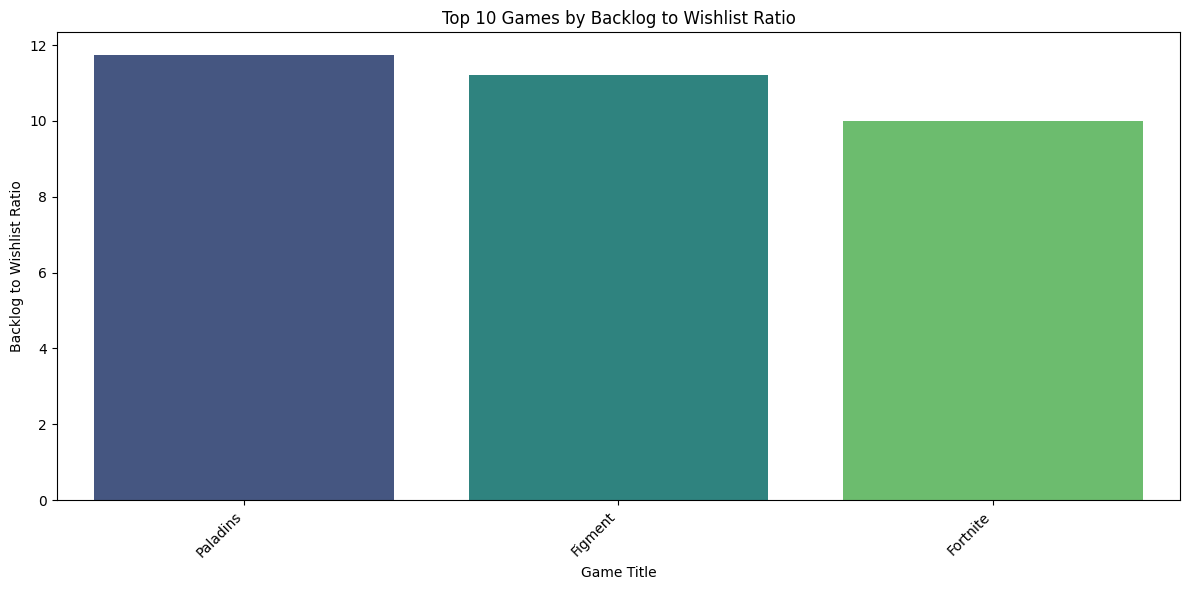

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 games with the highest backlog-to-wishlist ratio for visualization
top_10_backlog_wishlist = backlog_wishlist_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Backlog_to_Wishlist_Ratio', data=top_10_backlog_wishlist, palette='viridis')
plt.title('Top 10 Games by Backlog to Wishlist Ratio')
plt.xlabel('Game Title')
plt.ylabel('Backlog to Wishlist Ratio')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Game release trend across years

### Subtask:
Query the database to count game releases per year. Visualize the trend using a line plot.

**Reasoning**:
Query the database to count game releases per year, create a DataFrame with the results, and visualize the trend using a line plot.

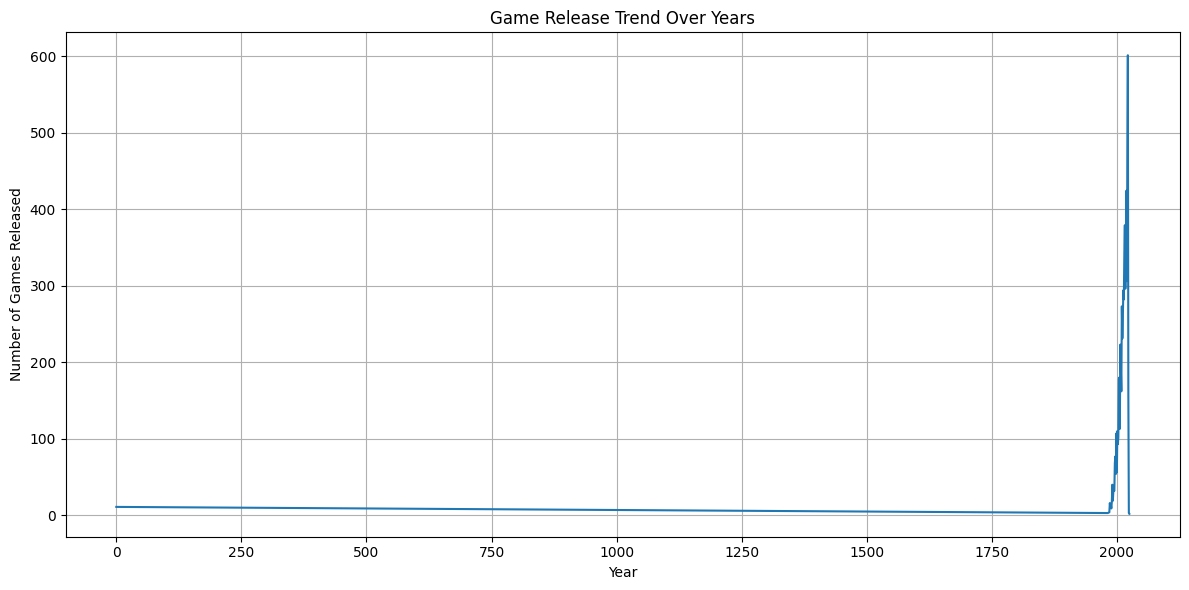

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to count game releases per year
query = """
SELECT
    CAST(SUBSTR("Release Date", -4) AS INTEGER) AS Release_Year,
    COUNT(*) AS Game_Count
FROM games_cleaned
WHERE "Release Date" IS NOT NULL AND "Release Date" != ''
GROUP BY Release_Year
ORDER BY Release_Year;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
yearly_releases_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Create a line plot to show the game release trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Release_Year', y='Game_Count', data=yearly_releases_df)

# Add title and labels
plt.title('Game Release Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## Distribution of user ratings

### Subtask:
Query the database to get the distribution of ratings. Visualize the distribution using a histogram or bar plot.

**Reasoning**:
Query the database to get all the ratings, create a DataFrame, and then visualize the distribution of ratings using a histogram.

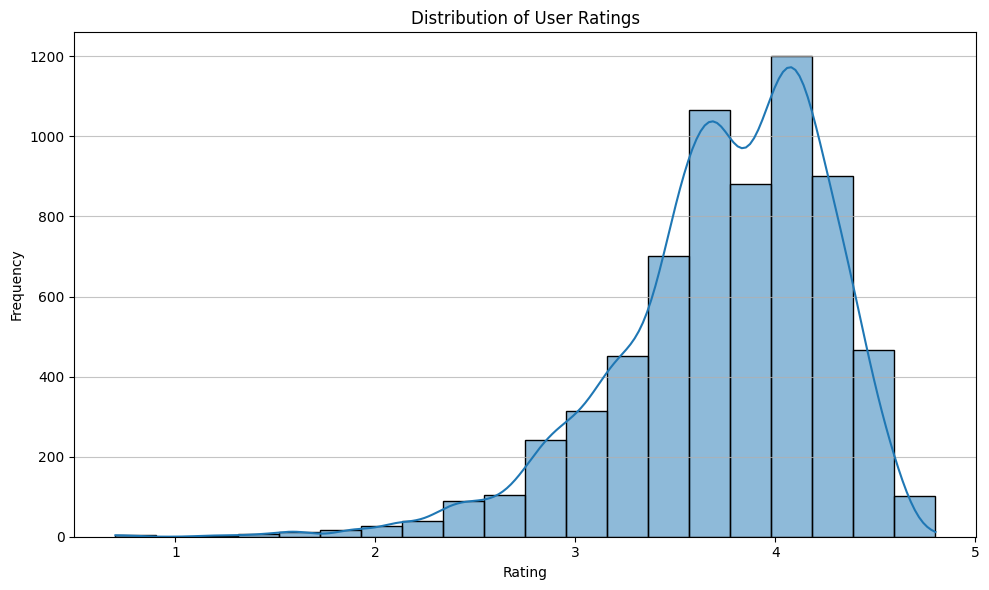

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get all ratings
query = """
SELECT Rating
FROM games_cleaned
WHERE Rating IS NOT NULL;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
ratings_df = pd.DataFrame(results, columns=column_names)

conn.close()

# Create a histogram to show the distribution of user ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=ratings_df, x='Rating', bins=20, kde=True)

# Add title and labels
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.tight_layout()
plt.show()

## Top 10 most wishlisted games

### Subtask:
Query the database to get games ordered by wishlist count. Display the top 10 wishlisted games.

**Reasoning**:
Query the database to get games ordered by wishlist count, create a DataFrame with the results, and display the top 10 games.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to select the top 10 most wishlisted games
query = """
SELECT
    Title,
    Wishlist
FROM games_cleaned
ORDER BY Wishlist DESC
LIMIT 10;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
top_wishlisted_games_df = pd.DataFrame(results, columns=column_names)

display(top_wishlisted_games_df)

conn.close()

,Title,Wishlist
0,The Legend of Zelda: Tears of the Kingdom,5400.0
1,The Legend of Zelda: Tears of the Kingdom,5400.0
2,The Legend of Zelda: Tears of the Kingdom,5400.0
3,The Legend of Zelda: Tears of the Kingdom,5400.0
4,Elden Ring,4800.0
5,Elden Ring,4800.0
6,Elden Ring,4800.0
7,Elden Ring,4800.0
8,Elden Ring,4800.0
9,Elden Ring,4800.0


## Average number of plays per genre

### Subtask:
Query the database to calculate the average number of plays for each genre. Display the results and potentially visualize them.

**Reasoning**:
Query the database to calculate the average number of plays for each genre, create a DataFrame with the results, and display the results.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to calculate the average number of plays for each genre
query = """
SELECT
    Genres,
    AVG(Plays) AS Average_Plays
FROM games_cleaned
WHERE Plays IS NOT NULL
GROUP BY Genres
ORDER BY Average_Plays DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
average_plays_per_genre_df = pd.DataFrame(results, columns=column_names)

display(average_plays_per_genre_df)

conn.close()

,Genres,Average_Plays
0,MOBA,10166.666667
1,Shooter,7611.490226
2,Platform,7211.077303
3,Racing,6912.459459
4,Turn Based Strategy,6908.681818
5,Adventure,6614.740204
6,Brawler,6546.706667
7,RPG,6510.095933
8,Simulator,5832.814286
9,Sport,5566.340909


**Reasoning**:
Visualize the average number of plays per genre using a bar plot.

/tmp/ipython-input-21-1358063798.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genres', y='Average_Plays', data=top_genres_by_plays, palette='viridis')


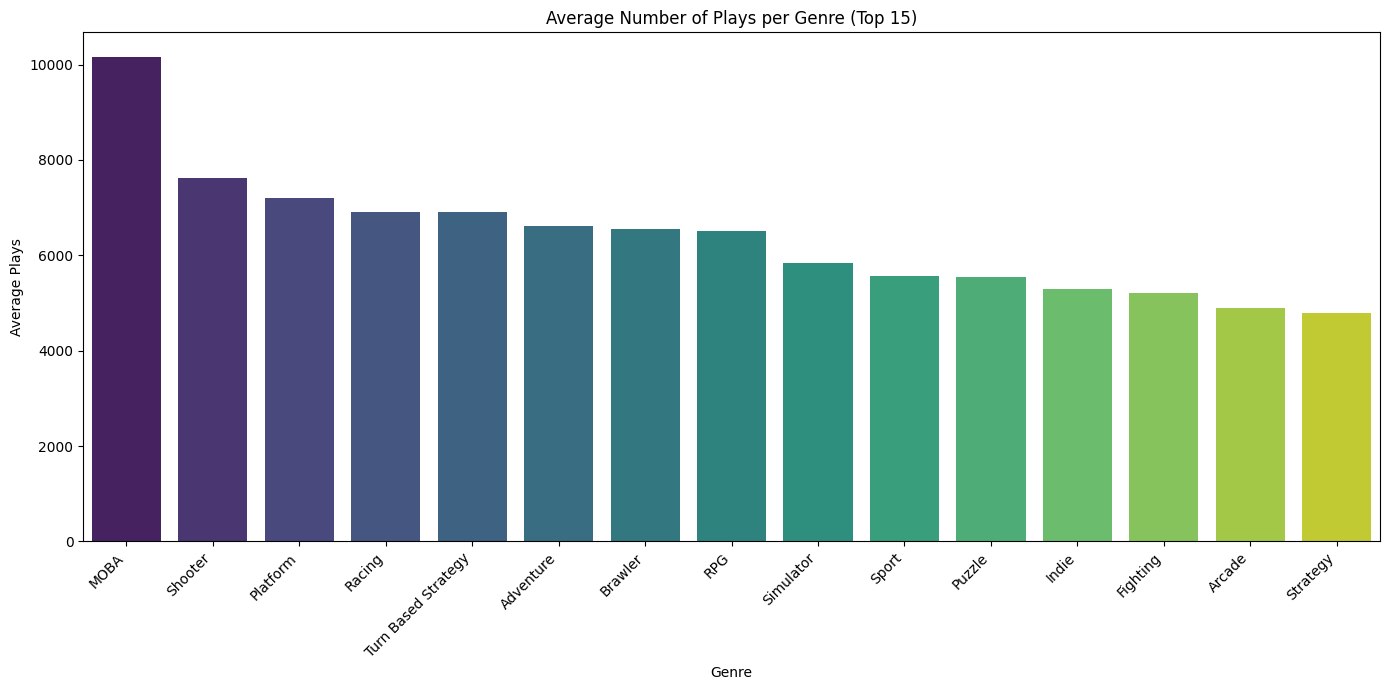

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top genres by average plays for visualization (e.g., top 15)
top_genres_by_plays = average_plays_per_genre_df.head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x='Genres', y='Average_Plays', data=top_genres_by_plays, palette='viridis')
plt.title('Average Number of Plays per Genre (Top 15)')
plt.xlabel('Genre')
plt.ylabel('Average Plays')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

**Reasoning**:
Visualize the top 10 most wishlisted games using a bar plot.

/tmp/ipython-input-22-4127997709.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Wishlist', data=top_10_wishlisted_games, palette='viridis')


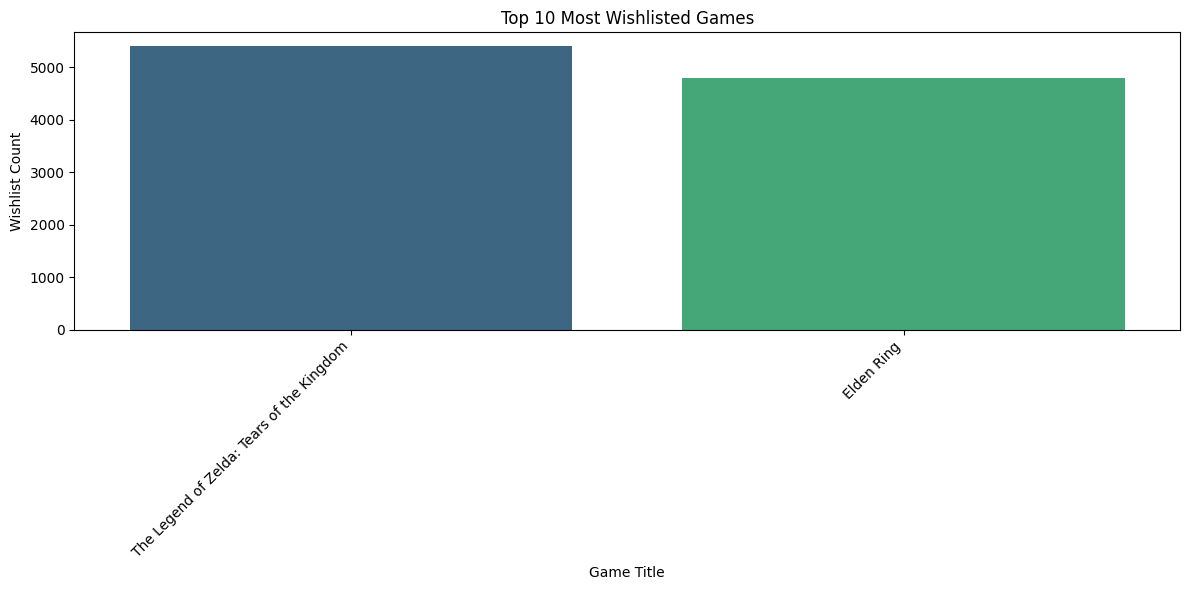

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 most wishlisted games for visualization
top_10_wishlisted_games = top_wishlisted_games_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Wishlist', data=top_10_wishlisted_games, palette='viridis')
plt.title('Top 10 Most Wishlisted Games')
plt.xlabel('Game Title')
plt.ylabel('Wishlist Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Most productive and impactful developer studios

### Subtask:
Query the database to get the number of games released by each team. Calculate average metrics for impact (average rating, plays, wishlists). Combine this information to identify productive and impactful studios. Display the results.

**Reasoning**:
Query the database to get the number of games released by each team and calculate average metrics for impact, then combine the results and display the top studios.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# SQL query to get the number of games released by each team and average impact metrics
query = """
SELECT
    Team,
    COUNT(*) AS Number_of_Games,
    AVG(Rating) AS Average_Rating,
    AVG(Plays) AS Average_Plays,
    AVG(Wishlist) AS Average_Wishlist
FROM games_cleaned
GROUP BY Team
ORDER BY Number_of_Games DESC, Average_Rating DESC, Average_Plays DESC, Average_Wishlist DESC;
"""

cursor.execute(query)
results = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
developer_impact_df = pd.DataFrame(results, columns=column_names)

display(developer_impact_df)

conn.close()

,Team,Number_of_Games,Average_Rating,Average_Plays,Average_Wishlist
0,Nintendo,527,3.805262,7231.438330,729.944972
1,Capcom,201,3.791045,5368.726368,744.218905
2,Square Enix,167,3.864511,5511.011976,962.766467
3,Sega,148,3.609527,5252.952703,879.182432
4,Electronic Arts,125,3.689093,9163.040000,629.512000
...,...,...,...,...,...
660,Gun Interactive,1,2.600000,2200.000000,67.000000
661,Illfonic,1,2.600000,2200.000000,67.000000
662,Blue Tongue Entertainment,1,2.500000,785.000000,28.000000
663,Bluehole Studio,1,2.400000,5200.000000,32.000000


Summary of Findings:

* We identified the top-rated games by user reviews.
* We found the developers with the highest average ratings.
* We determined the most common genres in the dataset.
* We identified games with a high backlog relative to their wishlist count.
* We visualized the trend of game releases across the years.
* We analyzed the distribution of user ratings.
* We displayed the top 10 most wishlisted games.
* We calculated and displayed the average number of plays per genre.
* We identified developer studios based on their productivity and impact metrics.

In [ ]:
df3 = pd.read_csv('')

In [ ]:
# Create an SQLite database and a table for df2
conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# Create table from df2 DataFrame schema
df2.to_sql('games_cleaned', conn, if_exists='replace', index=False)

# Close the connection
conn.close()